## 0. Download dataset
**Note:** If you can't download using gdown due to limited number of downloads, please download it manually and upload it to your drive, then copy it from the drive to colab.
```python
from google.colab import drive

drive.mount('/content/drive')
!cp /path/to/dataset/on/your/drive .
```

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

## 2. Load dataset

In [4]:
dataset_path = '/content/drive/MyDrive/Machine-learning/Execises/DecisionTree_RandomRorest/Housing.csv'
df = pd.read_csv(dataset_path)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## 3. Dealing with categorical data (optional)

### 3.1. Check categorical data

In [10]:
categorical_cols = df.select_dtypes(include=['object']).columns.to_list()
categorical_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [11]:
for col_name in categorical_cols:
  n_categories = df[col_name].nunique()
  print(f'Number of categories in {col_name}: {n_categories}')

Number of categories in mainroad: 2
Number of categories in guestroom: 2
Number of categories in basement: 2
Number of categories in hotwaterheating: 2
Number of categories in airconditioning: 2
Number of categories in prefarea: 2
Number of categories in furnishingstatus: 3


### 3.2. Encode Categorical Data

In [21]:
encoded_categories_cols = OrdinalEncoder().fit_transform(df[categorical_cols])
encoded_categories_df = pd.DataFrame(encoded_categories_cols, columns=categorical_cols)
numerical_df = df.drop(categorical_cols, axis=1)
encoded_df = pd.concat([numerical_df, encoded_categories_df], axis=1)

In [22]:
encoded_df

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,13300000,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,12250000,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12250000,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,12215000,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,11410000,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1.0,0.0,1.0,0.0,0.0,0.0,2.0
541,1767150,2400,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
542,1750000,3620,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
543,1750000,2910,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4. Normalization

In [25]:
dataset_arr = StandardScaler().fit_transform(encoded_df)
dataset_arr

array([[ 4.56636513,  1.04672629,  1.40341936, ...,  1.4726183 ,
         1.80494113, -1.40628573],
       [ 4.00448405,  1.75700953,  1.40341936, ...,  1.4726183 ,
        -0.55403469, -1.40628573],
       [ 4.00448405,  2.21823241,  0.04727831, ..., -0.67906259,
         1.80494113, -0.09166185],
       ...,
       [-1.61432675, -0.70592066, -1.30886273, ..., -0.67906259,
        -0.55403469,  1.22296203],
       [-1.61432675, -1.03338891,  0.04727831, ..., -0.67906259,
        -0.55403469, -1.40628573],
       [-1.61432675, -0.5998394 ,  0.04727831, ..., -0.67906259,
        -0.55403469,  1.22296203]])

## 6. Train test split

In [26]:
X = dataset_arr[:,1:]
y = dataset_arr[:,0]

In [28]:
test_size = 0.3
random_state = 1
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [34]:
print(f'Number of training samples: {X_train.shape[0]}')
print(f'Number of val samples: {X_val.shape[0]}')

Number of training samples: 381
Number of val samples: 164


## 6. Training

In [39]:
regressor = DecisionTreeRegressor(max_depth=3 ,random_state=random_state)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=1)

[Text(0.5, 0.875, 'x[0] <= 0.371\nsquared_error = 0.929\nsamples = 381\nvalue = 0.005'),
 Text(0.25, 0.625, 'x[2] <= 0.426\nsquared_error = 0.46\nsamples = 249\nvalue = -0.382'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[11] <= 0.566\nsquared_error = 0.33\nsamples = 201\nvalue = -0.531'),
 Text(0.0625, 0.125, 'squared_error = 0.303\nsamples = 120\nvalue = -0.362'),
 Text(0.1875, 0.125, 'squared_error = 0.266\nsamples = 81\nvalue = -0.78'),
 Text(0.375, 0.375, 'x[0] <= -0.77\nsquared_error = 0.527\nsamples = 48\nvalue = 0.238'),
 Text(0.3125, 0.125, 'squared_error = 0.129\nsamples = 15\nvalue = -0.219'),
 Text(0.4375, 0.125, 'squared_error = 0.569\nsamples = 33\nvalue = 0.446'),
 Text(0.75, 0.625, 'x[2] <= 0.426\nsquared_error = 0.998\nsamples = 132\nvalue = 0.734'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[4] <= -0.225\nsquared_error = 0.681\nsamples = 76\nvalue = 0.304'),
 Text(0.5625, 0.125, 'squared_error = 0.319\nsamples = 28\nvalue = -0.145'),
 Text(0.6875,

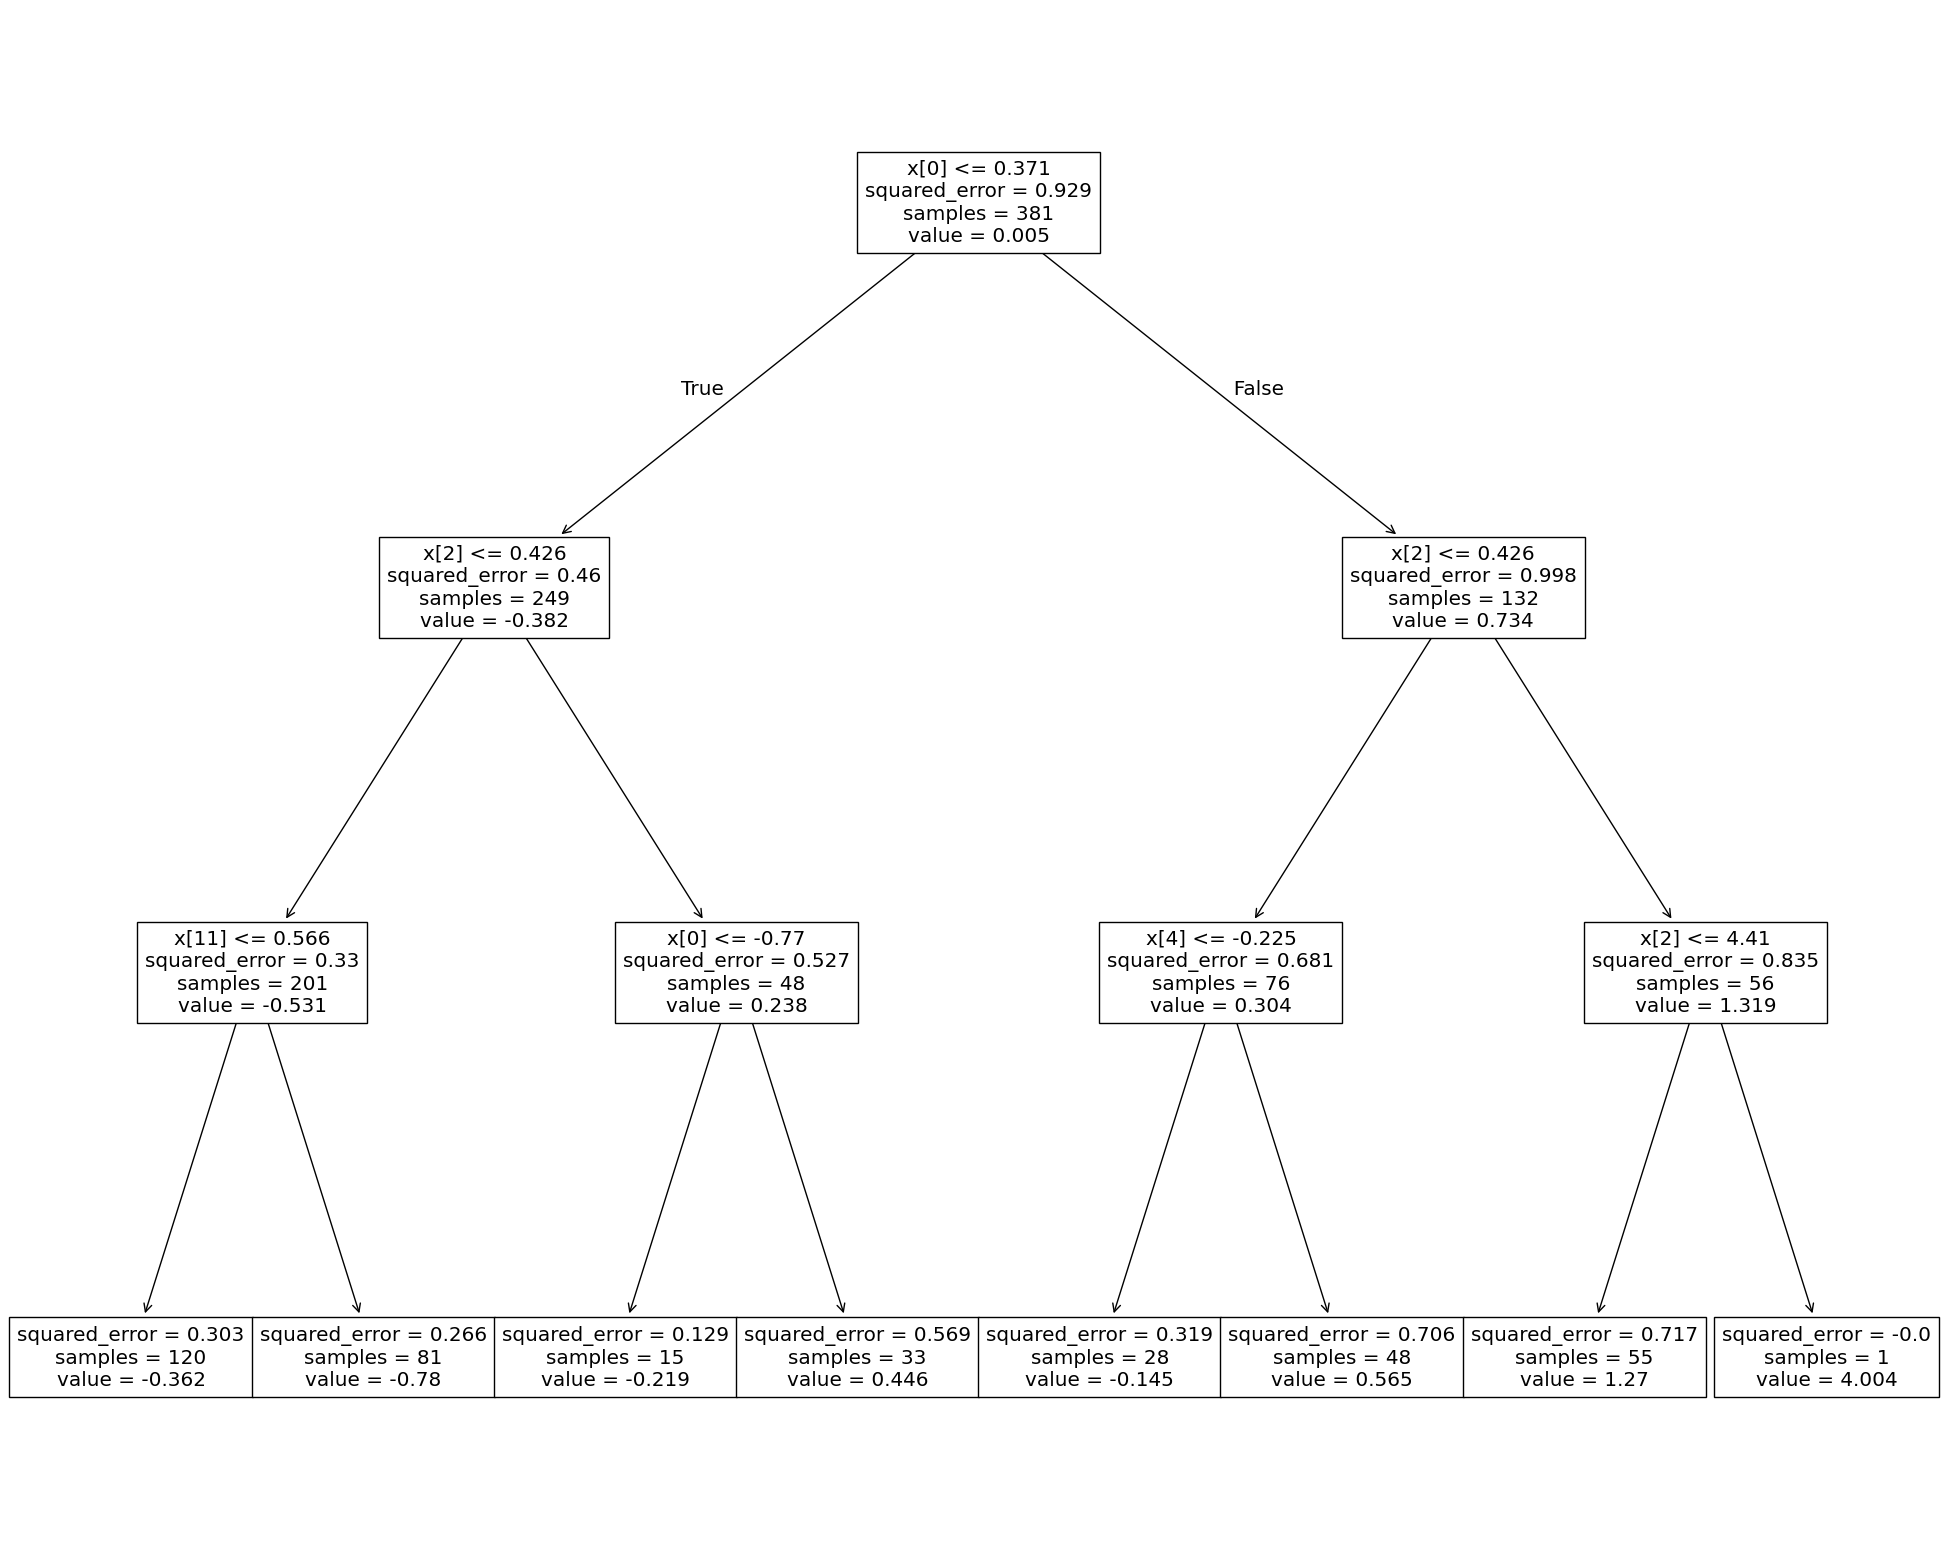

In [40]:
fig = plt.figure(figsize=(25,20))
plot_tree(regressor)

## 7. Evaluation

In [43]:
y_pred = regressor.predict(X_val)

In [44]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print('Evaluation results on validation set:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Evaluation results on validation set:
Mean Absolute Error: 0.5696575533557731
Mean Squared Error: 0.6226684506223363


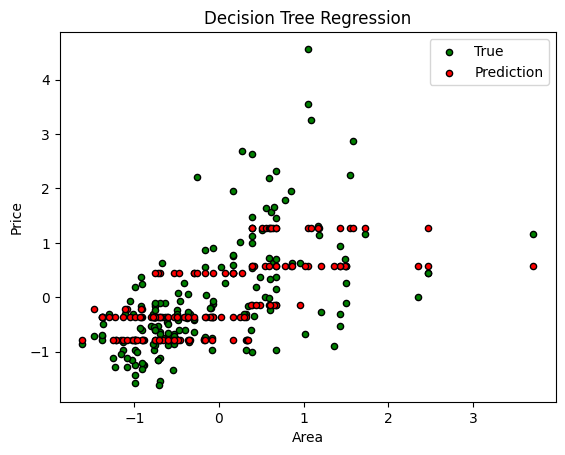

In [50]:
plt.figure()
plt.scatter(X_val[:,0], y_val, s=20, edgecolors='black', c='green', label='True')
plt.scatter(X_val[:,0], y_pred, s=20, edgecolors='black', c='red', label='Prediction')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()